In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


{
    "gender" : {
        "question" : "What is your gender?",
        "1" : "Male",
        "2" : "Female",
        "3" : "Other/No answer"
    },
    "age" : {
        "question" : "What is your age range?",
        "1" : "0-18",
        "2" : "19-25",
        "3" : "26-35",
        "4" : "36-50",
        "5" : "50-80",
        "6" : "80"
    },
    "school" : {
        "question" : "What is the highest level of school you have completed or the highest degree you have received?",
        "1" : "High school incomplete or less",
        "2" : "High school graduate or GED (includes technical/vocational training that doesn’t count towards college credit)",
        "3" : "Some college (some community college, associate’s degree)",
        "4" : "Four year college degree/bachelor’s degree",
        "5" : "Some postgraduate or professional schooling, no postgraduate degree",
        "6" : "Postgraduate or professional degree, including master’s, doctorate, medical or law degree"
    },
    "income" : {
        "question" : "Last year what was your total family income from all sources, before taxes?",
        "1" : "Less than $10,000",
        "2" : "$10,000 to less than $20,000",
        "3" : "$20,000 to less than $30,000",
        "4" : "$30,000 to less than $40,000",
        "5" : "$40,000 to less than $50,000",
        "6" : "$50,000 to less than $75,000",
        "7" : "$75,000 to less than $100,000",
        "8" : "$100,000 to less than $150,000",
        "9" : "$150,000 or more"
    },
    "party" : {
        "question" : "In politics today, do you consider yourself a:",
        "1" : "Republican",
        "2" : "Democrat",
        "3" : "Indipendent",
        "4" : "Something else"
    },
    "party_ln" : {
        "question" : "As of today do you lean more to:",
        "1" : "The Republican Party",
        "2" : "The Democratic Party"
    },
    "ideo" : {
        "question" : "In general, would you describe your political views as:",
        "1" : "Very conservative",
        "2" : "Conservative",
        "3" : "Moderate",
        "4" : "Liberal",
        "5" : "Very liberal"
    },
    "elections" : {
        "question" : "Have you voted in the 2016 US presidential election?",
        "1" : "Yes",
        "2" : "No",
        "3" : "Rather not answer"
    },
    "teaparty" : {
        "question" : "From what you know, do you agree or disagree with the Tea Party movement, or don't you have an opinion either way?",
        "1" : "Agree",
        "2" : "Disagree",
        "3" : "No opinion either way"
    }
}

In [ ]:
df = pd.read_csv("S100_Data.csv")
df = df.iloc[::8, :]


In [ ]:
df.head()

,unit_id,doc_id,rel,gender,age,school,income,party,party_ln,ideo,elections,teaparty,position_in_task,S100_rel,justification,url,off_page_count,time
0,unit_0,REP_LIE_doc6,LIE,2,5,3,6,3,1,2,1,1,1,3.0,"Rick Perry was governor of Texas, not Massachu...",https://en.wikipedia.org/wiki/Rick_Perry,0,59.715
8,unit_1,REP_TRUE_doc8,TRUE,1,3,6,9,1,1,2,1,1,1,100.0,\r\r\nThe average annual pension benefit for n...,https://www.politifact.com/new-jersey/statemen...,0,25.925
16,unit_2,DEM_HALFTRUE_doc3,HALFTRUE,1,4,3,9,1,1,2,1,1,1,40.0,Poltifact is generally spot on,https://www.politifact.com/global-news/stateme...,0,50.470
24,unit_3,DEM_BARELYTRUE_doc9,BARELYTRUE,1,4,4,6,3,2,3,1,2,1,17.0,"the 40-percent figure, refers to all gun trans...",https://www.washingtonpost.com/news/fact-check...,0,313.121
32,unit_4,REP_LIE_doc6,LIE,1,3,4,7,3,2,4,1,1,1,10.0,"Since its passage in April 2006, the Massachus...",https://www.healthaffairs.org/doi/full/10.1377...,0,116.611


In [ ]:
print(len(df))

200


In [ ]:
dfcorr = df.copy()

dfcorr.loc[dfcorr.elections == 3, 'elections'] = float('nan')
dfcorr.loc[dfcorr.teaparty == 3, 'teaparty'] = float('nan')
dfcorr.loc[dfcorr.gender == -1, 'gender'] = float('nan')

dfcorr['republican'] = 0
dfcorr['democrat'] = 0
dfcorr['independent'] = 0
dfcorr['somethingElse'] = 0

#renaming party
dfcorr.loc[dfcorr.party == 1, 'republican'] = 1
dfcorr.loc[dfcorr.party == 2, 'democrat'] = 1
dfcorr.loc[dfcorr.party == 3, 'independent'] = 1
dfcorr.loc[dfcorr.party == 4, 'somethingElse'] = 1

dfcorr = dfcorr.drop(columns=['party', 'position_in_task', 'off_page_count'])

#display(dfcorr.head(50))

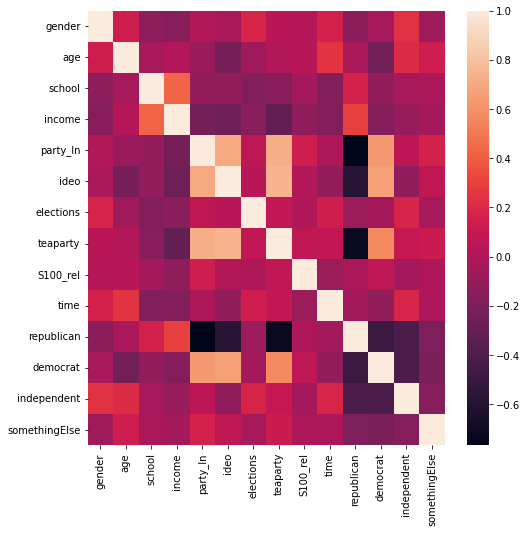

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))   
sns.heatmap(dfcorr.corr(), ax=ax);

In [ ]:
#renaming Gender
df.loc[df.gender == 1, 'gender'] = 'Male'
df.loc[df.gender == 2, 'gender'] = 'Female'
df.loc[df.gender == -1, 'gender'] = 'Other/No Answer'

#renaming party_in
df.loc[df.party_ln == 1, 'party_ln'] = 'The Republican Party'
df.loc[df.party_ln == 2, 'party_ln'] = 'The Democratic Party'

In [ ]:
#wie sind wähler bestimmter parteien?
#mediangehälter und bildungsgrad von Republikaner und Demokraten
#alter von Demokraten und Republikaner
#Histogramm Geschlechter Parteizugehörigkeit 4 Felder Matrix

select_df = df.loc[:, df.columns.intersection(['party_ln','income','gender', 'school'])]
rep_df = select_df.drop(select_df[select_df.party_ln != 'The Republican Party'].index)
dem_df = select_df.drop(select_df[select_df.party_ln != 'The Democratic Party'].index)

In [ ]:
print(rep_df['income'].mean())
print(dem_df['income'].mean())

6.43956043956044
5.458715596330276


In [ ]:
print(rep_df['school'].mean())
print(dem_df['school'].mean())

4.34065934065934
4.10091743119266


In [ ]:
print(rep_df['gender'].value_counts())
print(dem_df['gender'].value_counts())

Male      59
Female    32
Name: gender, dtype: int64
Male      70
Female    39
Name: gender, dtype: int64


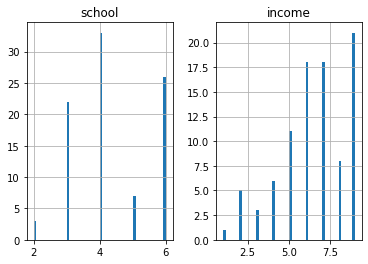

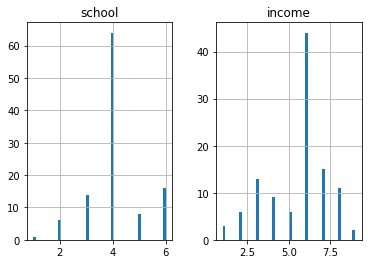

In [ ]:
hist = rep_df.hist(bins = 48)
hist = dem_df.hist(bins = 48)

<AxesSubplot:>

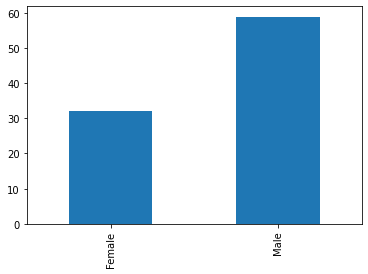

In [ ]:
rep_df.gender.value_counts().sort_values().plot(kind = 'bar')

<AxesSubplot:>

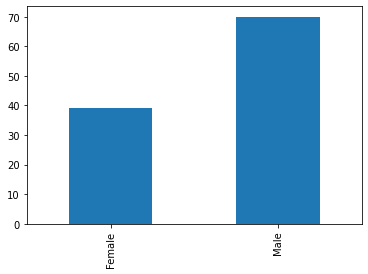

In [ ]:
dem_df.gender.value_counts().sort_values().plot(kind = 'bar')

<AxesSubplot:>

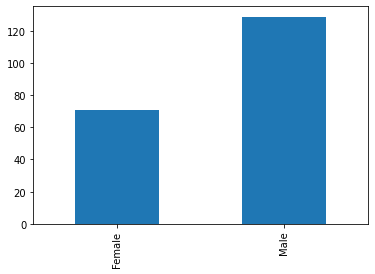

In [ ]:
df.gender.value_counts().sort_values().plot(kind = 'bar')

In [ ]:
#onehotencode gender
select_df.loc[select_df.gender == 'Female', 'gender'] = 1
select_df.loc[select_df.gender == 'Male', 'gender'] = 0
select_df.loc[select_df.gender == 'Other/No Answer', 'gender'] = float("nan")

#onehotencode target variable
select_df.loc[select_df.party_ln == 'The Democratic Party', 'party_ln'] = 1
select_df.loc[select_df.party_ln == 'The Republican Party', 'party_ln'] = 0

select_df = select_df.dropna()

In [ ]:
X = select_df.drop(columns=['party_ln'])
y = select_df['party_ln']
y = y.astype('int') 

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=10).fit(X, y)
model.predict_proba(X)
model.predict(X)
model.score(X, y)
confusion_matrix(y, model.predict(X))

array([[46, 45],
       [29, 80]])

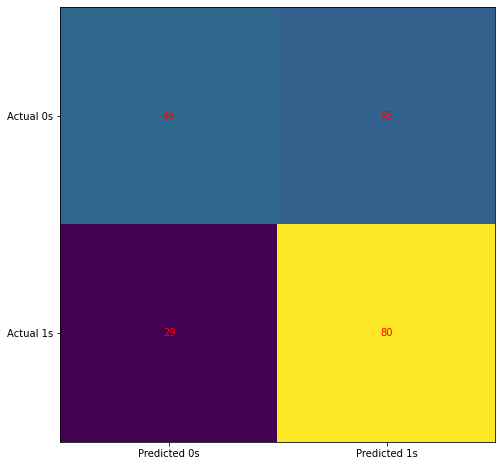

In [ ]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55        91
           1       0.64      0.73      0.68       109

    accuracy                           0.63       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.63      0.63      0.62       200



In [ ]:
#renaming Age
df.loc[df.age == 1, 'age'] = '0-18'
df.loc[df.age == 2, 'age'] = '19-25'
df.loc[df.age == 3, 'age'] = '26-35'
df.loc[df.age == 4, 'age'] = '36-50'
df.loc[df.age == 5, 'age'] = '50-80'
df.loc[df.age == 6, 'age'] = '80'

#renaming school
df.loc[df.school == 1, 'school'] = 'High school incomplete or less'
df.loc[df.school == 2, 'school'] = 'High school graduate or GED (includes technical/vocational training that doesn’t count towards college credit)'
df.loc[df.school == 3, 'school'] = 'Some college (some community college, associate’s degree)'
df.loc[df.school == 4, 'school'] = 'Four year college degree/bachelor’s degree'
df.loc[df.school == 5, 'school'] = 'Some postgraduate or professional schooling, no postgraduate degree'
df.loc[df.school == 6, 'school'] = 'Postgraduate or professional degree, including master’s, doctorate, medical or law degree'

#renaming income
df.loc[df.income == 1, 'income'] = 'Less than $10,000'
df.loc[df.income == 2, 'income'] = '$10,000 to less than $20,000'
df.loc[df.income == 3, 'income'] = '$20,000 to less than $30,000'
df.loc[df.income == 4, 'income'] = '$30,000 to less than $40,000'
df.loc[df.income == 5, 'income'] = '$40,000 to less than $50,000'
df.loc[df.income == 6, 'income'] = '$50,000 to less than $75,000'
df.loc[df.income == 7, 'income'] = '$75,000 to less than $100,000'
df.loc[df.income == 8, 'income'] = '$100,000 to less than $150,000'
df.loc[df.income == 9, 'income'] = '$150,000 or more'

#renaming party
df.loc[df.party == 1, 'party'] = 'Republican'
df.loc[df.party == 2, 'party'] = 'Democrat'
df.loc[df.party == 3, 'party'] = 'Indipendent'
df.loc[df.party == 4, 'party'] = 'Something else'

#renaming ideo
df.loc[df.ideo == 1, 'ideo'] = 'Very conservative'
df.loc[df.ideo == 2, 'ideo'] = 'Conservative'
df.loc[df.ideo == 3, 'ideo'] = 'Moderate'
df.loc[df.ideo == 4, 'ideo'] = 'Liberal'
df.loc[df.ideo == 5, 'ideo'] = 'Very Liberal'

#renaming elections
df.loc[df.elections == 1, 'elections'] = 'Yes'
df.loc[df.elections == 1, 'elections'] = 'No'
df.loc[df.elections == 1, 'elections'] = 'Rather not answer'

#renaming teaparty
df.loc[df.teaparty == 1, 'teaparty'] = 'Agree'
df.loc[df.teaparty == 2, 'teaparty'] = 'Disagree'
df.loc[df.teaparty == 3, 'teaparty'] = 'No opinion either way'



display(df)

,unit_id,doc_id,rel,gender,age,school,income,party,party_ln,ideo,elections,teaparty,position_in_task,S100_rel,justification,url,off_page_count,time
0,unit_0,REP_LIE_doc6,LIE,Female,50-80,"Some college (some community college, associat...","$50,000 to less than $75,000",Indipendent,The Republican Party,Conservative,Yes,Agree,1,3.0,"Rick Perry was governor of Texas, not Massachu...",https://en.wikipedia.org/wiki/Rick_Perry,0,59.715
8,unit_1,REP_TRUE_doc8,TRUE,Male,26-35,"Postgraduate or professional degree, including...","$150,000 or more",Republican,The Republican Party,Conservative,Yes,Agree,1,100.0,\r\r\nThe average annual pension benefit for n...,https://www.politifact.com/new-jersey/statemen...,0,25.925
16,unit_2,DEM_HALFTRUE_doc3,HALFTRUE,Male,36-50,"Some college (some community college, associat...","$150,000 or more",Republican,The Republican Party,Conservative,Yes,Agree,1,40.0,Poltifact is generally spot on,https://www.politifact.com/global-news/stateme...,0,50.470
24,unit_3,DEM_BARELYTRUE_doc9,BARELYTRUE,Male,36-50,Four year college degree/bachelor’s degree,"$50,000 to less than $75,000",Indipendent,The Democratic Party,Moderate,Yes,Disagree,1,17.0,"the 40-percent figure, refers to all gun trans...",https://www.washingtonpost.com/news/fact-check...,0,313.121
32,unit_4,REP_LIE_doc6,LIE,Male,26-35,Four year college degree/bachelor’s degree,"$75,000 to less than $100,000",Indipendent,The Democratic Party,Liberal,Yes,Agree,1,10.0,"Since its passage in April 2006, the Massachus...",https://www.healthaffairs.org/doi/full/10.1377...,0,116.611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,unit_195,LOW,LOW,Male,50-80,Four year college degree/bachelor’s degree,"$50,000 to less than $75,000",Indipendent,The Democratic Party,Liberal,Yes,No opinion either way,4,0.0,Formula one did not exist during Lincoln's tim...,https://en.wikipedia.org/wiki/American_footbal...,4,325.240
1568,unit_196,HIGH,HIGH,Female,26-35,"Postgraduate or professional degree, including...","$75,000 to less than $100,000",Democrat,The Democratic Party,Very Liberal,Yes,Disagree,4,99.0,this is was just a chant that we can do things...,https://en.wikipedia.org/wiki/Barack_Obama_200...,1,114.089
1576,unit_197,REP_TRUE_doc4,TRUE,Male,26-35,Four year college degree/bachelor’s degree,"$20,000 to less than $30,000",Indipendent,The Democratic Party,Very Liberal,Yes,Disagree,4,100.0,This is a true statement made by Romney,https://www.politifact.com/truth-o-meter/state...,1,74.237
1584,unit_198,REP_BARELYTRUE_doc3,BARELYTRUE,Female,26-35,"Some postgraduate or professional schooling, n...","$50,000 to less than $75,000",Indipendent,The Republican Party,Liberal,2,Disagree,4,66.0,miller's predecessors questioning whether the ...,https://www.texastribune.org/2015/04/11/sid-mi...,2,51.948


In [ ]:
print(df.isna().sum())

unit_id             0
doc_id              0
rel                 0
gender              0
age                 0
school              0
income              0
party               0
party_ln            0
ideo                0
elections           0
teaparty            0
position_in_task    0
S100_rel            1
justification       0
url                 0
off_page_count      0
time                1
dtype: int64


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7373d0f7-b35e-460a-b7ec-c43f8d39233d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>